# Les Chaînes de Markov Cachées

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import random as rd
from sklearn.model_selection import KFold

## I) Notre principale série d'étude 

In [14]:
from pandas_datareader import data as wb
dataset=wb.DataReader('^GSPC',data_source='yahoo',start='1-1-1995')

In [15]:
dataset

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,459.269989,457.200012,459.209991,459.109985,262450000,459.109985
1995-01-04,460.720001,457.559998,459.130005,460.709991,319510000,460.709991
1995-01-05,461.299988,459.750000,460.730011,460.339996,309050000,460.339996
1995-01-06,462.489990,459.470001,460.380005,460.679993,308070000,460.679993
1995-01-09,461.769989,459.739990,460.670013,460.829987,278790000,460.829987
1995-01-10,464.589996,460.899994,460.899994,461.679993,352450000,461.679993
1995-01-11,463.609985,458.649994,461.679993,461.660004,346310000,461.660004
1995-01-12,461.929993,460.630005,461.640015,461.640015,313040000,461.640015
1995-01-13,466.429993,461.640015,461.640015,465.970001,336740000,465.970001


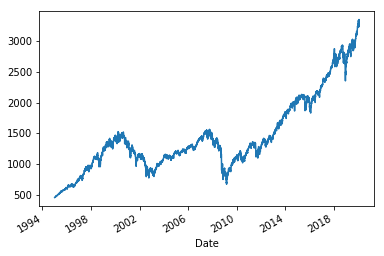

In [16]:
data = dataset['Close']
data.plot()

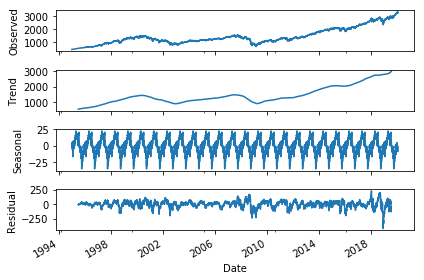

In [17]:
result3=seasonal_decompose(dataset['Close'],model='additive',freq=252)
decompose = result3.plot()
plt.savefig("figure.png")

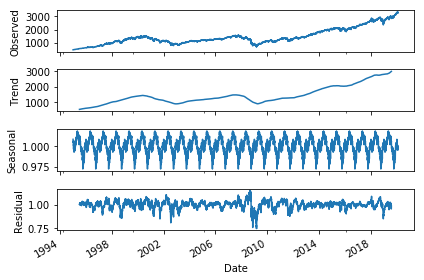

In [18]:
result4=seasonal_decompose(dataset['Close'],model='multiplicative',freq=252)
fig4 = result4.plot()

On remarque que l'amplitude du motif de la saisonnalité ne dépends pas de la valeur moyenne (tendance) des données. On choisira donc de décomposer le signal en un signal attidif : 

S = Trend + Seasonnality + Residual 

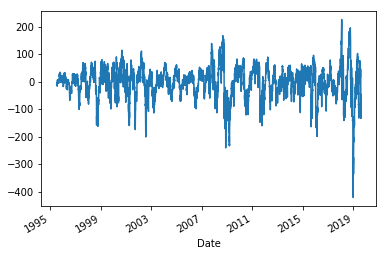

In [19]:
dataR=result3.resid
dataR.plot()

## II)Raisonnement

### 1) Définir $\lambda$
On choisit un $\lambda$ simple avec une matrice de transition uniforme, probabilité d'émission gaussienne et l'état initial est l'état 1 $\text{ i.e }\pi=(1,0,...,0)$

### 2)Trouver le nombre d'état cachés $N$:  
#### a) Marchine Learning méthode, the   M-Fold Cross validation (M=5 ou 8 ou 10 : arbitraire): 
- On coupe les données en M partie
- Boucle de M itérations:
 - la M-ième partie sera la partie test et on entraine le modèle sur les autres parties (Baum-Welch)
 - On calcule la vraissemblance sur la partie test pour obtenir un score (Bayes)
- On prends la moyenne de ces M tests qu'on note L
- On trace L=f(M), on choisit M tel que M maximise L

#### b) Méthode statistique:
- On fait varier N de 2 à 6 
- On entraîne les données :
 - On prends M plages de données,
 - On recalibre l'état $\lambda$ avec Baum-Welch à chaque plage de donnée
- On trace les 4 critères AIC, BIC,HQC, CAIC en fonction de chaque plage de donnée (5 courbes pour chaque critère)
- Choix de N qui minimise ces critères sur la globalité des K essais, des N courbes

## III) Applications

### 1) Modèle discret 

Algorithme Forward 

In [119]:
def forward(X, a, b, initial_distribution):
    T=X.shape[0] #temps T : taille des observations -1 car index python
    N=a.shape[0] #N : nombre d'états -1 car index python
    alpha = np.zeros((T, N))
    alpha[0, :] = initial_distribution * b[:, X[0]] #initialisation de alpha ; -1 dû python
    for t in range(1, T):
        for j in range(N):
            alpha[t, j] = alpha[t - 1].dot(a[:, j]) * b[j, X[t]] #récurrence ; 
 
    return(alpha)

Données émises :
On observe une séquence de 20 nombres compris entre 0 et 9.
O variable aléatoire telle que $O(\Omega)=0,1,2,...,9$.

Les états cachés z (qui ne le sont pas vraiment) sont : $z_0$= "pair" et $z_1$="impair".
La matrice de transition est alors :   $$A=\frac{1}{2}\begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} $$  

Quand on est dans l'état caché impaire (respectivement paire), on émet avec une probabilité uniforme un nombre impair (resp. pair) compris entre 0 et 9. 
La matrice d'émission est alors:   $$B=\frac{1}{5}\begin{pmatrix}  1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 \\ 0 & 1 & 0 & 1 & 0 & 1 & 0 & 1 & 0 \end{pmatrix}$$

La distribution initiale est uniforme : $\pi(z_0)=\pi(z_1)=\frac{1}{2}$

In [163]:
X = np.array([rd.randrange(0,10) for i in range (0,20)])
A=(1/2)*np.ones((2,2))
B=np.array([[0.15,0.05,0.15,0.05,0.15,0.05,0.15,0.05,0.15,0.05],[0.05,0.15,0.05,0.15,0.05,0.15,0.05,0.15,0.05,0.15]])
pi=np.array([1/2,1/2])
alpha = forward(X,A,B,pi)
X
alpha

array([[7.5e-02, 2.5e-02],
       [2.5e-03, 7.5e-03],
       [2.5e-04, 7.5e-04],
       [2.5e-05, 7.5e-05],
       [2.5e-06, 7.5e-06],
       [7.5e-07, 2.5e-07],
       [2.5e-08, 7.5e-08],
       [7.5e-09, 2.5e-09],
       [2.5e-10, 7.5e-10],
       [2.5e-11, 7.5e-11],
       [2.5e-12, 7.5e-12],
       [7.5e-13, 2.5e-13],
       [2.5e-14, 7.5e-14],
       [7.5e-15, 2.5e-15],
       [2.5e-16, 7.5e-16],
       [7.5e-17, 2.5e-17],
       [2.5e-18, 7.5e-18],
       [2.5e-19, 7.5e-19],
       [7.5e-20, 2.5e-20],
       [2.5e-21, 7.5e-21]])

Evidemment, pour un état fixé z, $\alpha_{t}(z)$ est décroissante en fonction du temps car il y a de plus en plus de possibilités. 

On s'intéresse donct à $\alpha_{t}(z)$ à t fixé. 

In [164]:
def impaire(X):
    res = []
    for i in range(X.shape[0]):
        if X[i]%2==0:
            res.append(0)
        else:
            res.append(1)
    res=np.array(res)
    return(res)
impaire(X)

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

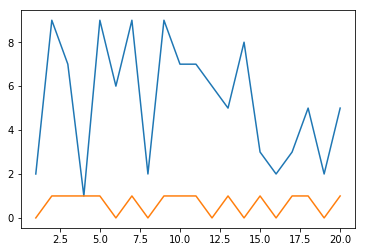

In [165]:
Temps=np.linspace(1,X.shape[0],X.shape[0])
plt.plot(Temps,X,Temps,impaire(X))

Qu'émet notre système $\pi$,A,B ?

In [166]:
def simul_markov(Vecteur_Proba):
    Vecteur_Proba_cumule = np.cumsum(Vecteur_Proba)
    U =rd.random()
    X = 0
    while U>Vecteur_Proba_cumule[X]:
        X=X+1
    return(X)
simul_markov(np.array([1/2,1/2]))

0

In [170]:
etats_caches=[simul_markov(pi)]
emission = [simul_markov(B[etats_caches[0]])]
for i in range(1,20):
    etats_caches.append(simul_markov(A[res[i-1]-1]))
    emission.append(simul_markov(B[etats_caches[i]]))
print("états cachés: ",etats_caches)
print("observation: ",emission)

états cachés:  [1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1]
observation:  [3, 2, 0, 6, 4, 7, 7, 9, 7, 0, 4, 7, 0, 1, 2, 2, 4, 2, 9, 3]


#### Solution au problème 1 : $P(O|\lambda)$

In [22]:
S1=sum(alpha[-1])
print("O=",X,", proba=",S1)

O= [ 9 10 10  8  2  8  9  3 10  4  3  9  8  5  9  9  8  7 10] , proba= 1.000000000000001e-19


Algorithme Backward

In [23]:
def backward(X, a, b):
    beta = np.zeros((X.shape[0], a.shape[0]))
    beta[X.shape[0] - 1] = np.ones((a.shape[0]))
    for t in range(X.shape[0] - 2, -1, -1):
        for j in range(a.shape[0]):
            beta[t, j] = (beta[t + 1] * b[:, X[t + 1]-1]).dot(a[j, :])
 
    return beta

In [24]:
backward(X,a,b)

array([[1.e-18, 1.e-18],
       [1.e-17, 1.e-17],
       [1.e-16, 1.e-16],
       [1.e-15, 1.e-15],
       [1.e-14, 1.e-14],
       [1.e-13, 1.e-13],
       [1.e-12, 1.e-12],
       [1.e-11, 1.e-11],
       [1.e-10, 1.e-10],
       [1.e-09, 1.e-09],
       [1.e-08, 1.e-08],
       [1.e-07, 1.e-07],
       [1.e-06, 1.e-06],
       [1.e-05, 1.e-05],
       [1.e-04, 1.e-04],
       [1.e-03, 1.e-03],
       [1.e-02, 1.e-02],
       [1.e-01, 1.e-01],
       [1.e+00, 1.e+00]])

In [25]:
def baum_welch(X, a, b, initial_distribution, n_iter=100):
    N = a.shape[0]
    T = len(X)
 
    for n in range(n_iter):
        alpha = forward(X, a, b, initial_distribution)
        beta = backward(X, a, b)
 
        xi = np.zeros((N, N, T - 1))
        for t in range(T - 1):
            denominator = np.dot(np.dot(alpha[t, :].T, a) * b[:, X[t + 1]].T, beta[t + 1, :])
            for i in range(N):
                numerator = alpha[t, i] * a[i, :] * b[:, X[t + 1]].T * beta[t + 1, :].T
                xi[i, :, t] = numerator / denominator
 
        gamma = np.sum(xi, axis=1)
        a = np.sum(xi, 2) / np.sum(gamma, axis=1).reshape((-1, 1))
 
       #Add additional T'th element in gamma
        gamma = np.hstack((gamma, np.sum(xi[:, :, T - 2], axis=0).reshape((-1, 1))))
 
        K = b.shape[1]
        denominator = np.sum(gamma, axis=1)
        for l in range(K):
            b[:, l] = np.sum(gamma[:, X == l], axis=1)
        b = np.divide(b, denominator.reshape((-1, 1)))

    return {"a":a, "b":b}

### 2) Modèle continu

Création du modèle

In [26]:
from hmmlearn import hmm
N=3
model = hmm.GaussianHMM(n_components=N,covariance_type="diag")
model.startprob_ = np.concatenate((np.array([1]),np.zeros(N-1)))
model.transmat_=1/N*np.ones(N)


K fold Cross Validation

In [27]:
M=10
kfM= KFold(M)
x=[i for i in range(10)]
for train,test in kfM.split(x):
    print(train,test)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


-5715.246793266275
-5731.621051029958
-5752.307336932807
-5799.119439908771
-5868.70332736872
-5916.947801018908
-6003.393236360808
-5985.018666207113
-6041.84054536397


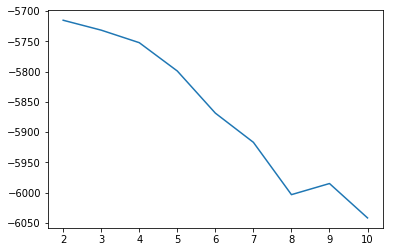

In [28]:
M=10
Likelihood=[]
for N in range(2,11):
    model = hmm.GaussianHMM(n_components=N,covariance_type="diag")
    model.startprob_ = np.concatenate((np.array([1]),np.zeros(N-1)))
    model.transmat_=(1/N)*np.ones(N)
    
    kfM=KFold(M)
    res=[]
    donnee=dataR.values
    for train,test in kfM.split(donnee):
        model.fit(train.reshape(-1,1))
        res.append(model.score(test.reshape(-1,1)))
    resultat = sum(res)/len(res)
    print(resultat)
    Likelihood.append(resultat)
plt.plot([i for i in range(2,11)],Likelihood)

In [39]:
X[2]

10

In [62]:
plt.plot(g)

0.8248377299882009

In [92]:
eta =np.zeros((6, 1))

In [93]:
eta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [94]:
eta[0]

array([0.])

In [105]:
alpha = np.array([[i,2] for i in range(6)])

In [96]:
alpha

array([[0, 2],
       [1, 2],
       [2, 2],
       [3, 2],
       [4, 2],
       [5, 2]])

In [99]:
l=[sum(alpha[i]) for i in range(6)]
l

[2, 3, 4, 5, 6, 7]

In [114]:
alpha.shape

(20, 2)

In [115]:
T = alpha.shape[0]
N = alpha.shape[1]
eta =np.zeros((T, N))
for t in range(T):
    eta[t]=alpha[t]/sum(alpha[t])

In [116]:
eta

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [154]:
alpha

array([[1.e-01, 0.e+00],
       [1.e-02, 0.e+00],
       [1.e-03, 0.e+00],
       [1.e-04, 0.e+00],
       [1.e-05, 0.e+00],
       [1.e-06, 0.e+00],
       [1.e-07, 0.e+00],
       [1.e-08, 0.e+00],
       [1.e-09, 0.e+00],
       [1.e-10, 0.e+00],
       [1.e-11, 0.e+00],
       [1.e-12, 0.e+00],
       [0.e+00, 1.e-13],
       [1.e-14, 0.e+00],
       [0.e+00, 1.e-15],
       [1.e-16, 0.e+00],
       [1.e-17, 0.e+00],
       [0.e+00, 1.e-18],
       [0.e+00, 1.e-19],
       [1.e-20, 0.e+00]])

In [155]:
alpha[0]

array([0.1, 0. ])

In [181]:
l = np.array([[0 , 1],[0 , 1]])

In [182]:
l

array([[0, 1],
       [0, 1]])

In [171]:
pi

array([0.5, 0.5])

In [172]:
pi*B[:, 3]

array([0.025, 0.075])

In [176]:
l*pi

array([0. , 0.5])

In [177]:
pi*l

array([0. , 0.5])

In [179]:
A

array([[0.5, 0.5],
       [0.5, 0.5]])